In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
####################################################
# Load the data
df = pd.read_csv("test.csv.xz", compression='xz')
#print(df.head())

# take a random sample of 1000 rows
df = df.sample(n=10000)

ontime = df[df['DEP_DEL15'] == 0]
delayed = df[df['DEP_DEL15'] == 1]

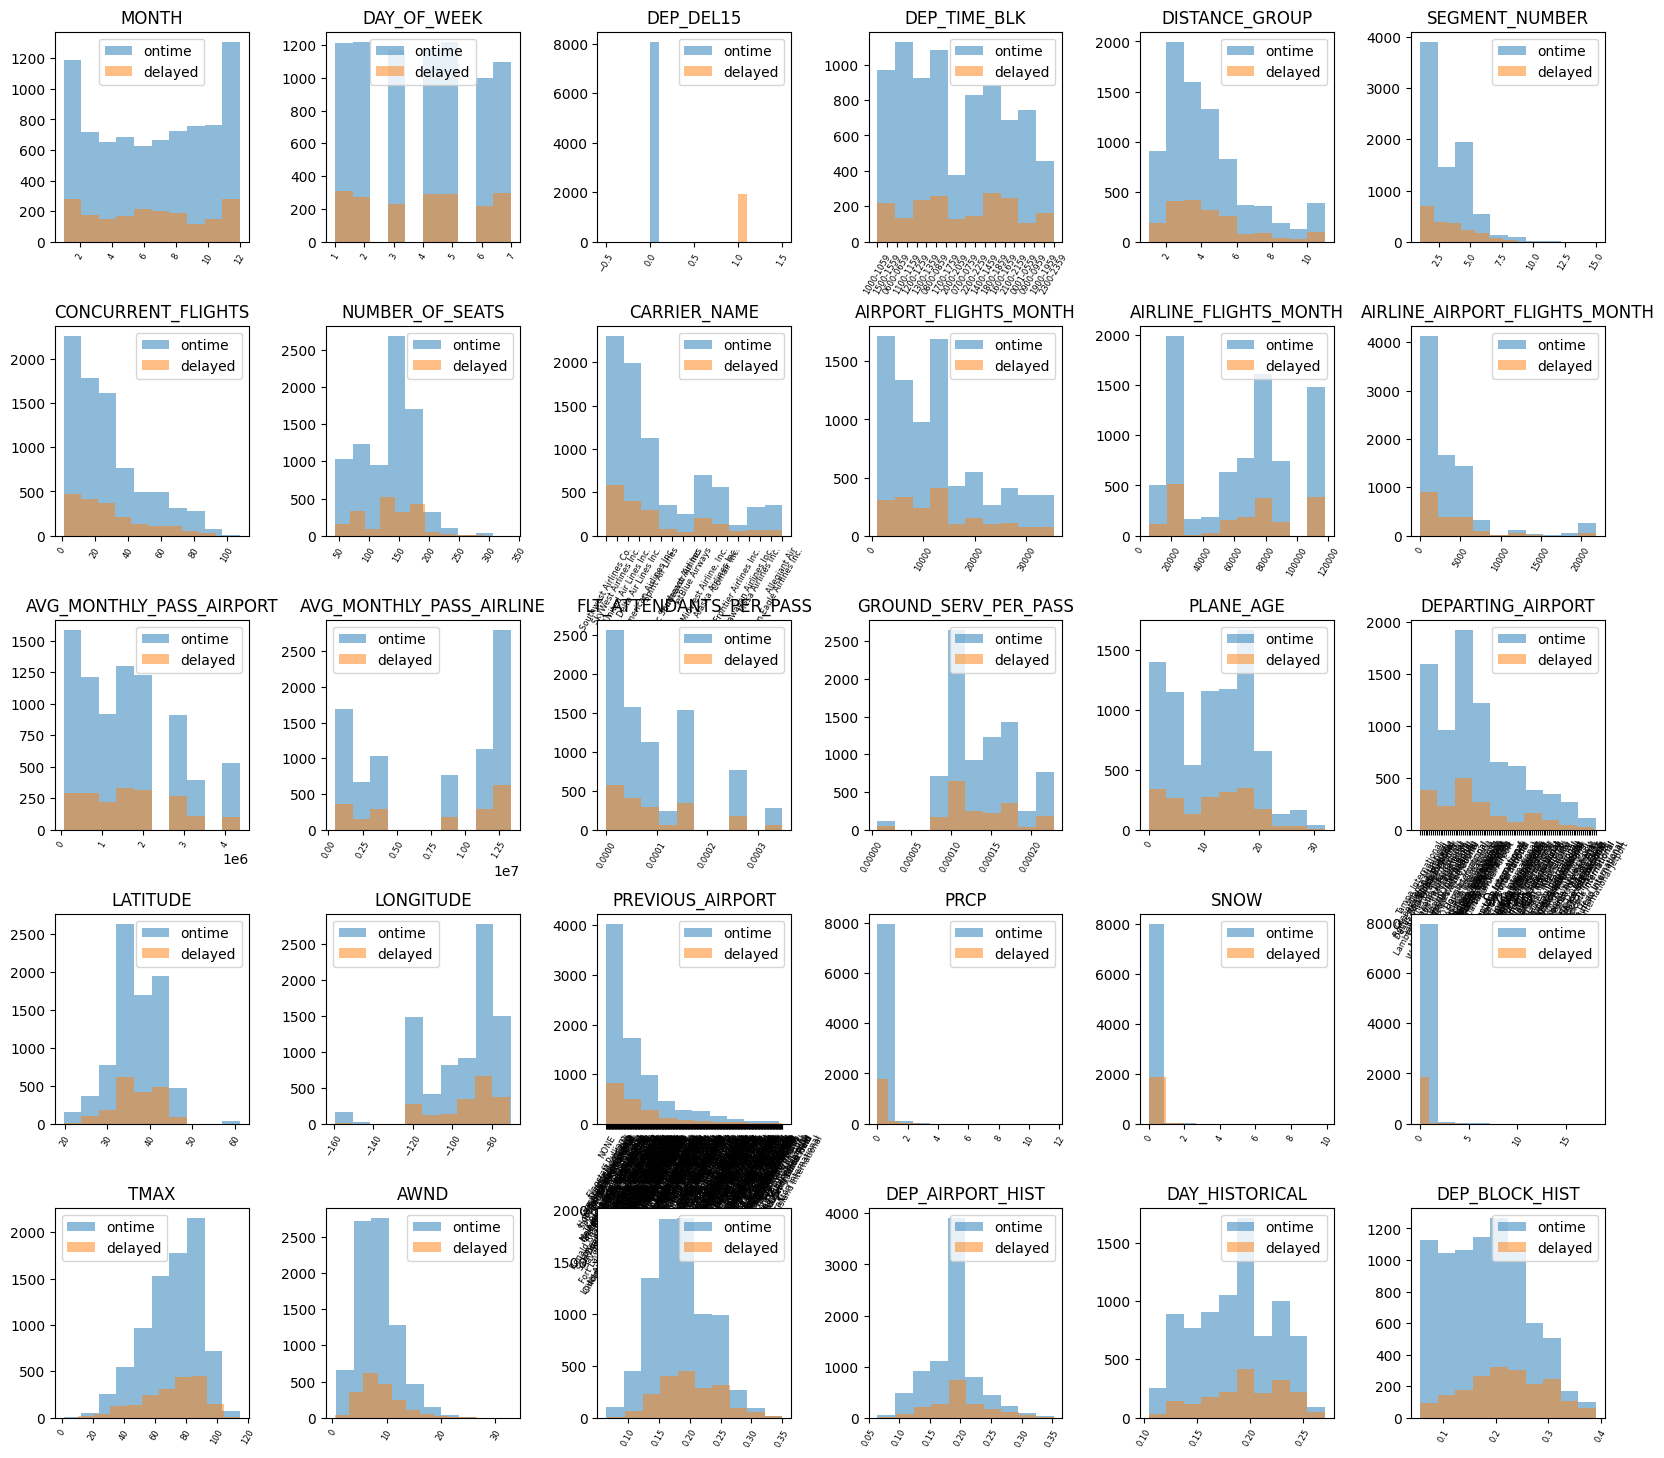

In [3]:
# Inital EDA
# Plot the columns of the ontime and delayed flights and compare, put all the plots in the same figure
# Create a figure with 5 rows and 6 columns which are well spaced
fig, axs = plt.subplots(5, 6, figsize=(20, 18))

for i, col in enumerate(df.columns):
    ax = axs[i // 6, i % 6]
    ax.hist(ontime[col], alpha=0.5, label='ontime')
    ax.hist(delayed[col], alpha=0.5, label='delayed')
    ax.tick_params(axis='x', rotation=60, labelsize=6)
    ax.set_title(col)
    ax.legend()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# plt.savefig('flights.png')
plt.show()

In [26]:
# DATA CLEANING
# encode the categorical data
le = LabelEncoder()

def clean_labels_encoder(list_of_labels, df):
    for label in list_of_labels:
        df[label] = le.fit_transform(df[label])
    return df

# clean the labels
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']
df = clean_labels_encoder(list_of_labels, df)

# Drop the columns that are not needed
df = df.drop(['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
       'DEP_BLOCK_HIST'], axis=1)

# Fill the missing values
df.fillna(df.mean(), inplace=True)


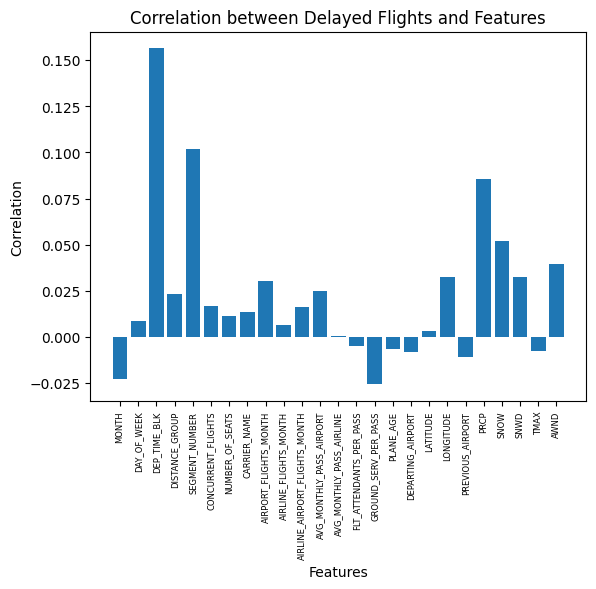

DEP_TIME_BLK                     0.156408
SEGMENT_NUMBER                   0.101587
PRCP                             0.085483
SNOW                             0.051714
AWND                             0.039280
SNWD                             0.032537
LONGITUDE                        0.032230
AIRPORT_FLIGHTS_MONTH            0.030438
AVG_MONTHLY_PASS_AIRPORT         0.024710
DISTANCE_GROUP                   0.023340
CONCURRENT_FLIGHTS               0.016495
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.016175
CARRIER_NAME                     0.013670
NUMBER_OF_SEATS                  0.011154
DAY_OF_WEEK                      0.008590
AIRLINE_FLIGHTS_MONTH            0.006429
LATITUDE                         0.003112
AVG_MONTHLY_PASS_AIRLINE         0.000376
FLT_ATTENDANTS_PER_PASS         -0.004769
PLANE_AGE                       -0.006845
TMAX                            -0.007896
DEPARTING_AIRPORT               -0.008052
PREVIOUS_AIRPORT                -0.011044
MONTH                           -0

In [5]:
# FEATURE ENGINEERING
# Calculate the correlation between DEP_DEL15 and the other columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()['DEP_DEL15']
correlation = correlation.drop(['DEP_DEL15'])


#print(correlation)

# Plot the correlation
plt.bar(correlation.index, correlation)
plt.xticks(rotation=90)
plt.tick_params(axis='x', rotation=90, labelsize=6)
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.title("Correlation between Delayed Flights and Features")
plt.show()


# Sort the correlation
correlation = correlation.sort_values(ascending=False)
print(correlation)

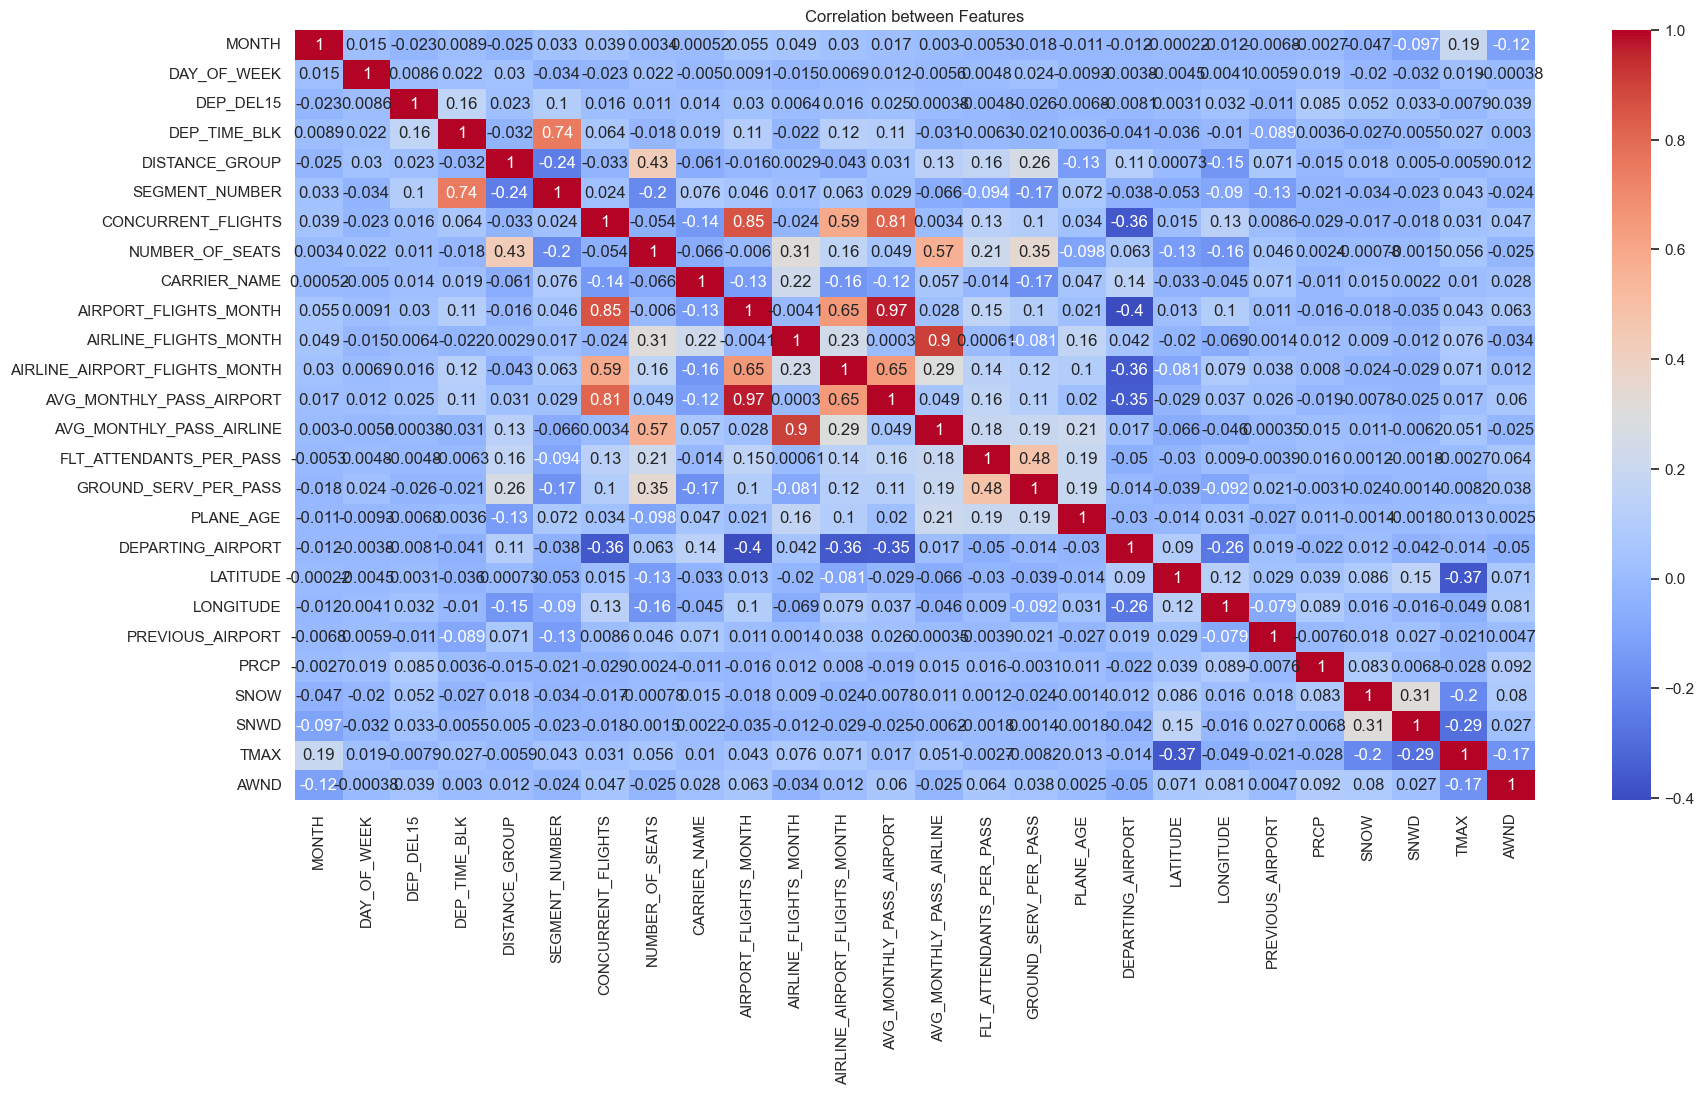

In [6]:
# Plot some heatmaps to see the correlation between the features


def plot_heatmap(df):
    plt.figure(figsize=(20, 10))
    sns.set_theme(style='whitegrid', context='notebook')
    cols = [0, 1, 2]
    sns.heatmap(df.corr(), annot=True, square=False, cmap='coolwarm')
    plt.title('Correlation between Features')
    plt.show()

plot_heatmap(df)

In [32]:

# Split the data into training and testing data
def performTraining(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

performTraining(df)

0.799
[[1582   12]
 [ 390   16]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1594
           1       0.57      0.04      0.07       406

    accuracy                           0.80      2000
   macro avg       0.69      0.52      0.48      2000
weighted avg       0.76      0.80      0.72      2000

